# **Amazon Sales Analysis**

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("Amazon Sale Report.csv")

In [ ]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

In [ ]:
df["Status"].value_counts()

,count
Status,
Shipped,77815
Shipped - Delivered to Buyer,28756
Cancelled,18334
Shipped - Returned to Seller,1954
Shipped - Picked Up,973
Pending,658
Pending - Waiting for Pick Up,281
Shipped - Returning to Seller,145
Shipped - Out for Delivery,35


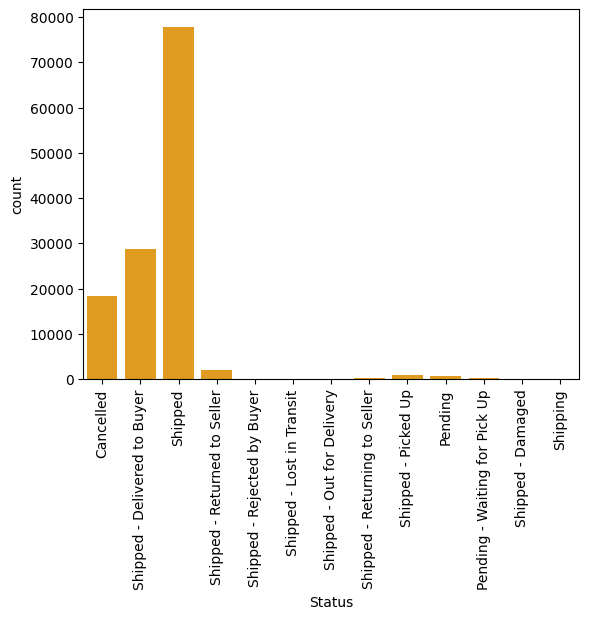

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Status", data=df , color="Orange")
plt.xticks(rotation=90)
plt.show()

**Key Insight:**Most orders are shipped successfully, but some are delayed in delivery. Cancellation rates are relatively low, and some orders are returned to sellers. This suggests areas for improvement in logistics and product quality

In [ ]:
df["Fulfilment"].value_counts()

,count
Fulfilment,
Amazon,89713
Merchant,39263


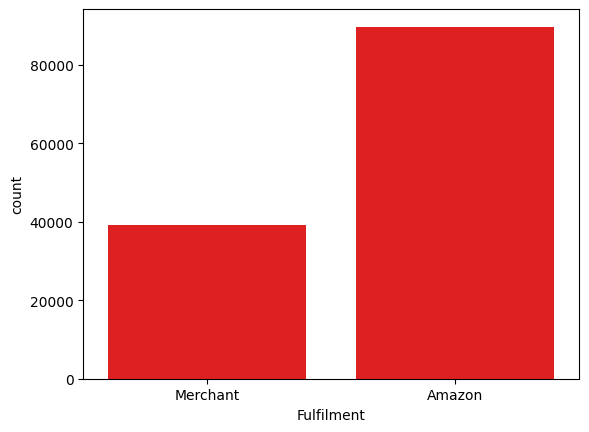

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Fulfilment", data=df , color="red")

plt.show()

**Key Insight:**Amazon is handling most of the order fulfillment, while merchants are handling fewer orders. This shows Amazon's strong logistics and delivery capabilities are being used extensively.

In [ ]:
df["ship-service-level"]

,ship-service-level
0,Standard
1,Standard
2,Expedited
3,Standard
4,Expedited
...,...
128971,Expedited
128972,Expedited
128973,Expedited
128974,Expedited


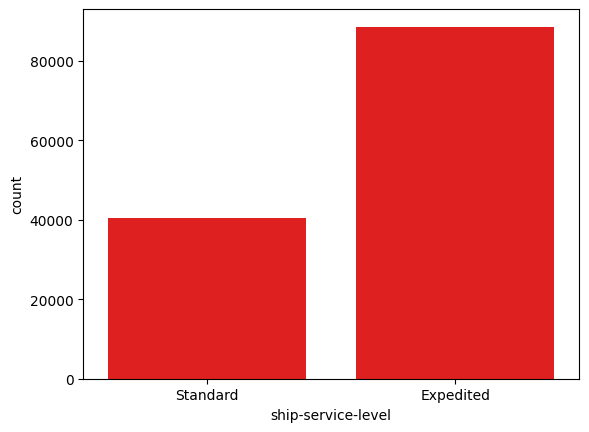

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="ship-service-level", data=df , color="red")

plt.show()

**Key Insight:**Expedited shipping service level is significantly more popular than Standard shipping, with nearly twice as many counts. This suggests a strong preference for faster shipping options among customers.

In [ ]:
df["Category"]

,Category
0,T-shirt
1,Shirt
2,Shirt
3,Blazzer
4,Trousers
...,...
128971,Shirt
128972,T-shirt
128973,Blazzer
128974,T-shirt


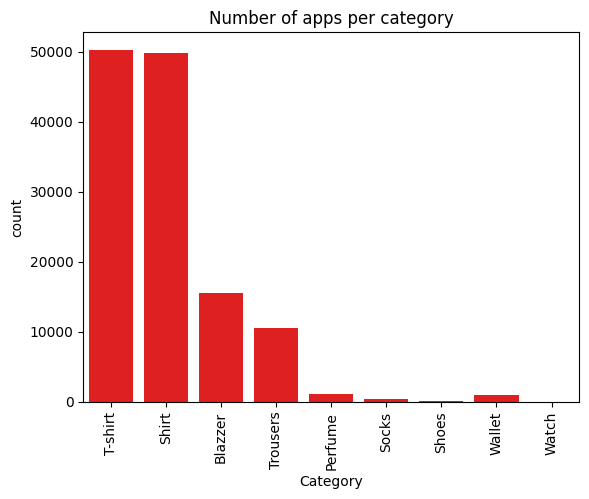

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Category", data=df , color="red")
plt.xticks(rotation=90)
plt.title("Number of apps per category")

plt.show()

**Key Insight:**T-shirts and shirts are the most popular categories, followed by blazers and other apparel items like trousers, shoes, and accessories.

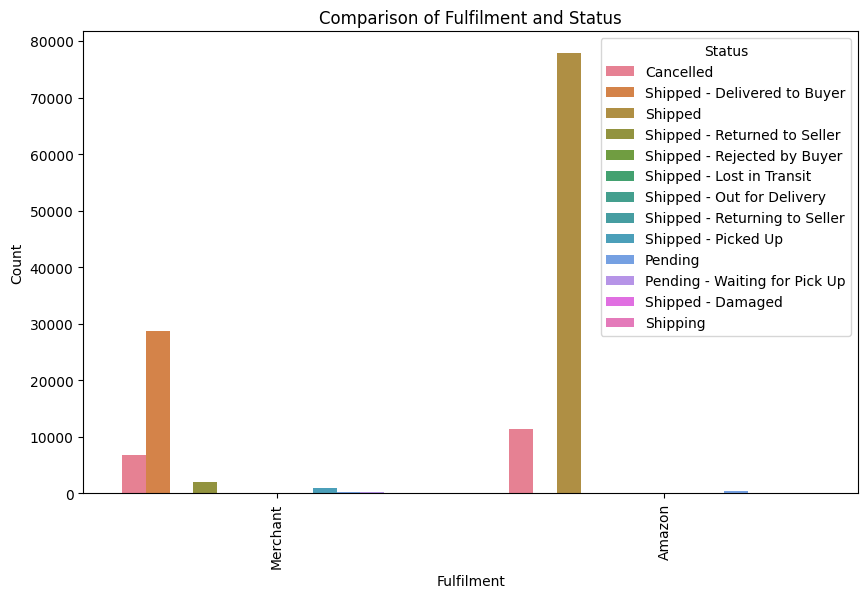

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
# Create a grouped bar chart
sns.countplot(x='Fulfilment', hue='Status', data=df)

# Customize the chart
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Comparison of Fulfilment and Status')
plt.xlabel('Fulfilment')
plt.ylabel('Count')

# Display the chart
plt.show()

**Key Insight:**Amazon fulfillment has more shipments, while merchant fulfillment has more deliveries to buyers. Amazon has higher cancellations, while merchants have more pending orders. This suggests differences in fulfillment efficiency and order management between Amazon and merchants.

In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

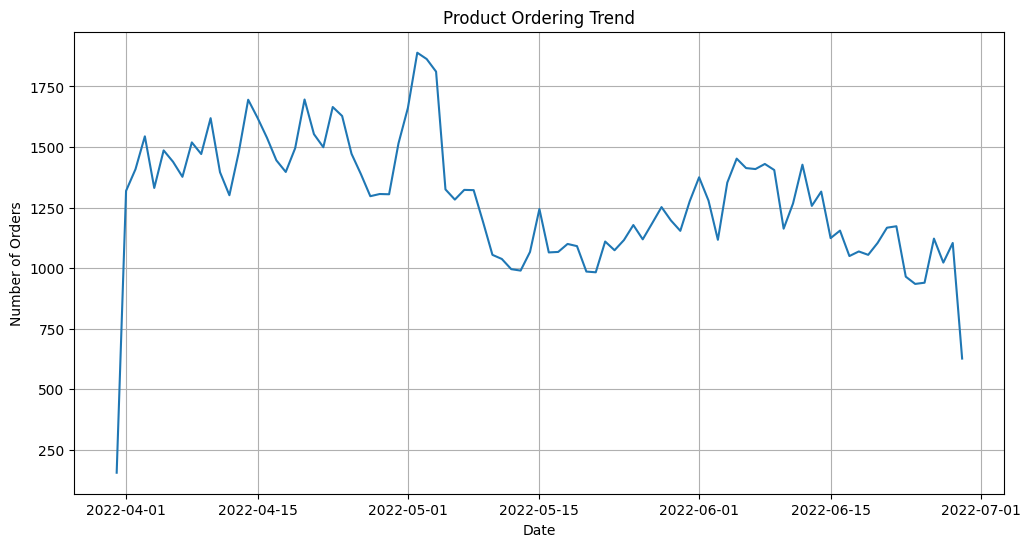

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df' and has a 'Date' column and a 'Quantity' column
# Convert the 'Date' column to datetime objects if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by date and sum the quantities for each date
daily_orders = df.groupby('Date')['Qty'].sum()

# Plot the daily order trend
plt.figure(figsize=(12, 6))
plt.plot(daily_orders.index, daily_orders.values)
plt.title('Product Ordering Trend')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

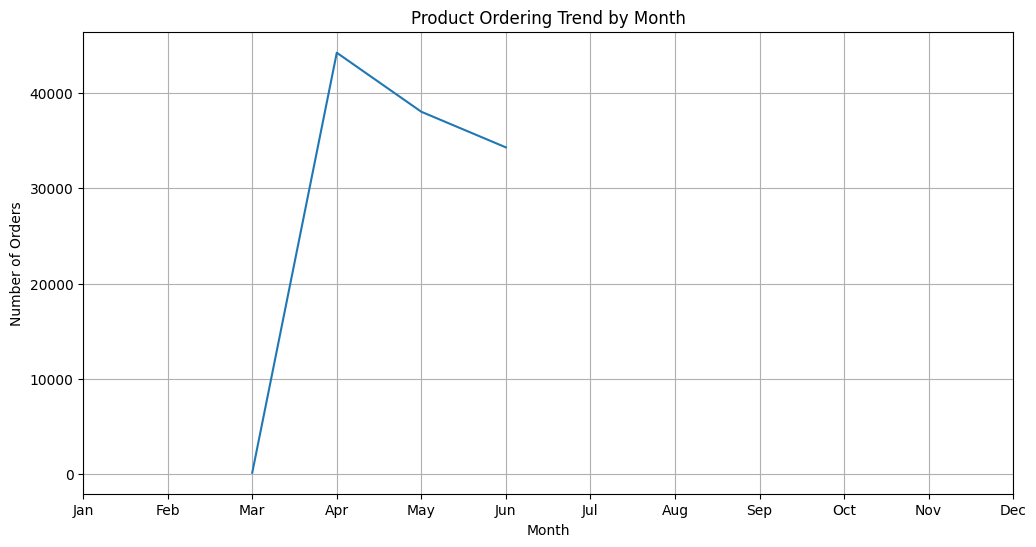

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df' and has a 'Date' column and a 'Quantity' column
# Convert the 'Date' column to datetime objects if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month from the 'Date' column
df['Month'] = df['Date'].dt.month

# Group the data by month and sum the quantities for each month
monthly_orders = df.groupby('Month')['Qty'].sum()

# Plot the monthly order trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders.index, monthly_orders.values)
plt.title('Product Ordering Trend by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set x-axis ticks to month names
plt.grid(True)
plt.show()

**Key Insight:**Product ordering trend shows a significant spike in April, followed by a moderate decline in May and June. This suggests a peak in demand during April, with a subsequent tapering off in the following months

In [ ]:
df["Sales Channel"].value_counts()

,count
Sales Channel,
Amazon.in,128852
Non-Amazon,124


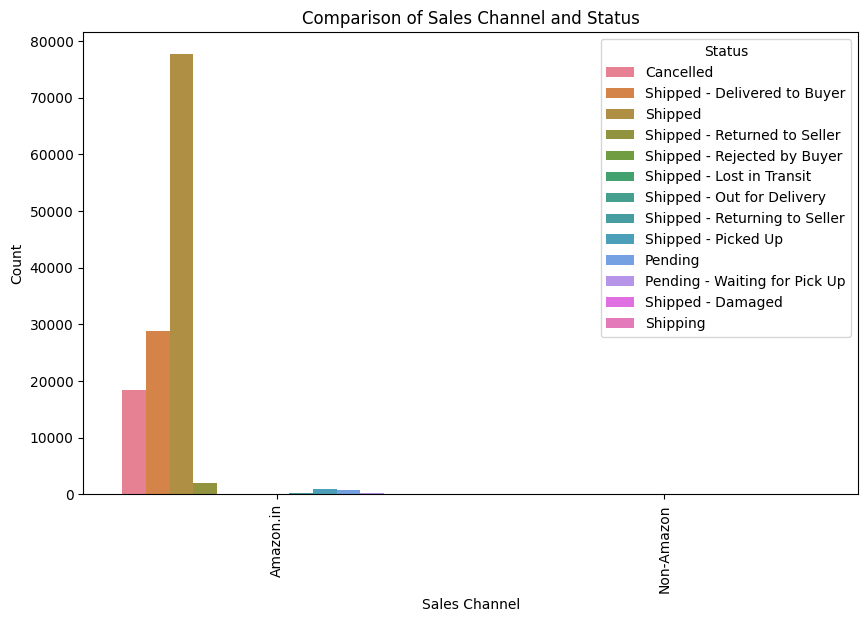

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grouped bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.countplot(x='Sales Channel', hue='Status', data=df)

# Customize the chart
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Comparison of Sales Channel and Status')
plt.xlabel('Sales Channel')
plt.ylabel('Count')

# Display the chart
plt.show()

**Key Insight:**Amazon sales have a lot of shipments, but not all are delivered to buyers. Non-Amazon sales are very low or almost zero.

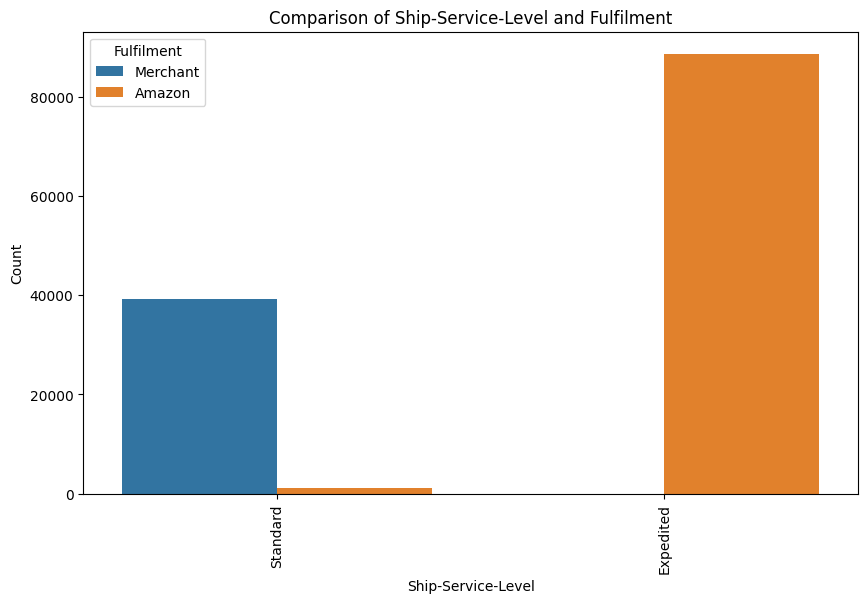

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grouped bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.countplot(x='ship-service-level', hue='Fulfilment', data=df)

# Customize the chart
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Comparison of Ship-Service-Level and Fulfilment')
plt.xlabel('Ship-Service-Level')
plt.ylabel('Count')

# Display the chart
plt.show()

**Key Insight:**Merchants handle more Standard shipping, while Amazon dominates Expedited shipping. This shows a clear division of labor between Amazon and merchants based on shipping speed

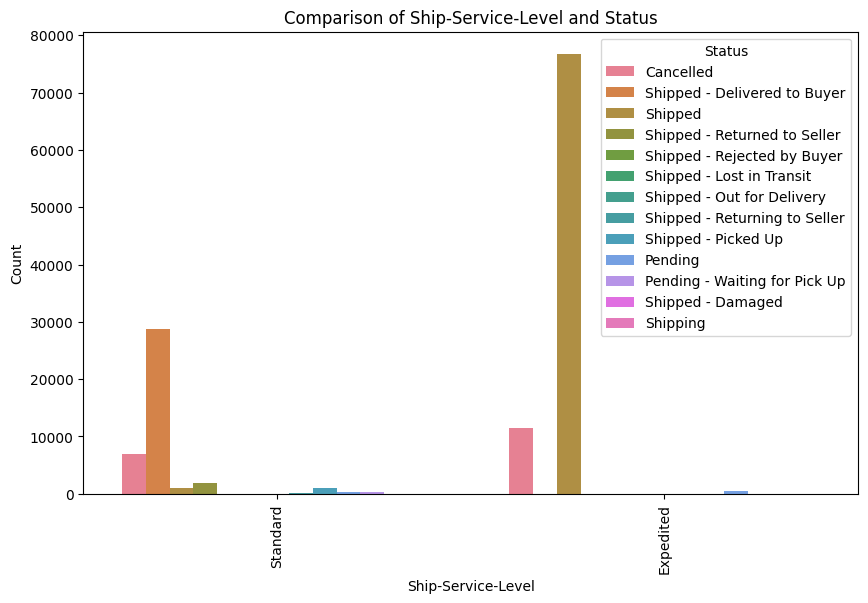

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grouped bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.countplot(x='ship-service-level', hue='Status', data=df)

# Customize the chart
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Comparison of Ship-Service-Level and Status')
plt.xlabel('Ship-Service-Level')
plt.ylabel('Count')

# Display the chart
plt.show()

**Key Insight:**Standard shipping has more deliveries to buyers, while Expedited shipping has more shipments but fewer deliveries. Expedited shipping also has more cancellations and fewer pending orders compared to Standard shipping

The category with the highest number of orders is: T-shirt


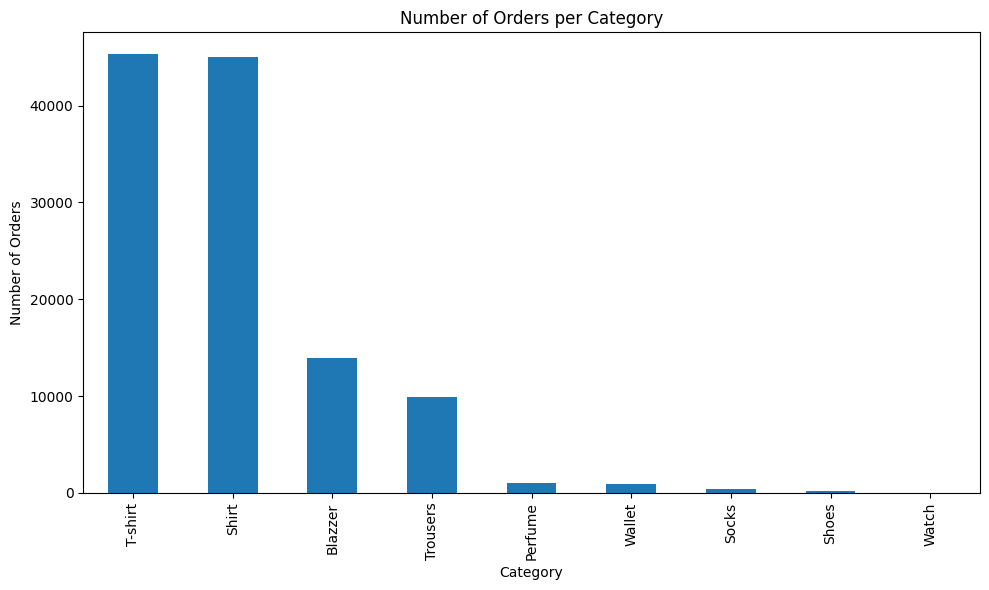

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df' and has a 'Category' and 'Qty' column
category_orders = df.groupby('Category')['Qty'].sum().sort_values(ascending=False)

# Get the category with the highest number of orders
top_category = category_orders.index[0]

# Print the result
print(f"The category with the highest number of orders is: {top_category}")

# Create a bar chart to visualize the order distribution across categories
plt.figure(figsize=(10, 6))
category_orders.plot(kind='bar')
plt.title('Number of Orders per Category')
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**Key Insight:**T-shirts are the top-selling category, followed closely by shirts. Blazers, trousers, wallets, and perfumes also have notable sales, but at lower levels.

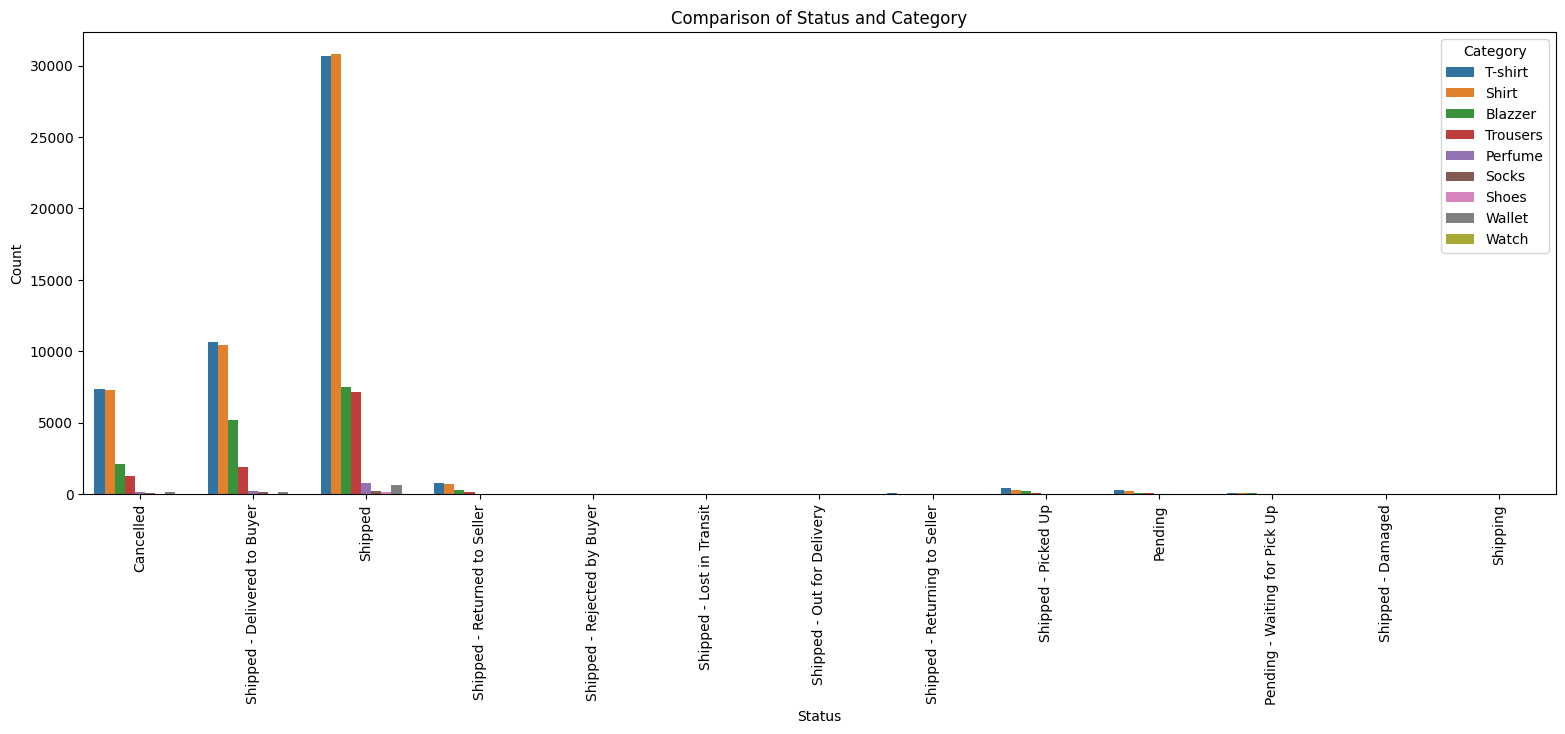

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grouped bar chart
plt.figure(figsize=(19, 6))  # Adjust figure size if needed
sns.countplot(x='Status', hue='Category', data=df)

# Customize the chart
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Comparison of Status and Category')
plt.xlabel('Status')
plt.ylabel('Count')

# Display the chart
plt.show()

**Key Insight:**Shirts and T-shirts dominate both shipments and deliveries. Shipments are the highest, followed by deliveries to buyers, and then cancellations. This shows a clear picture of order fulfillment and delivery performance across categories

In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS', 'Month'],
      dtype='object')

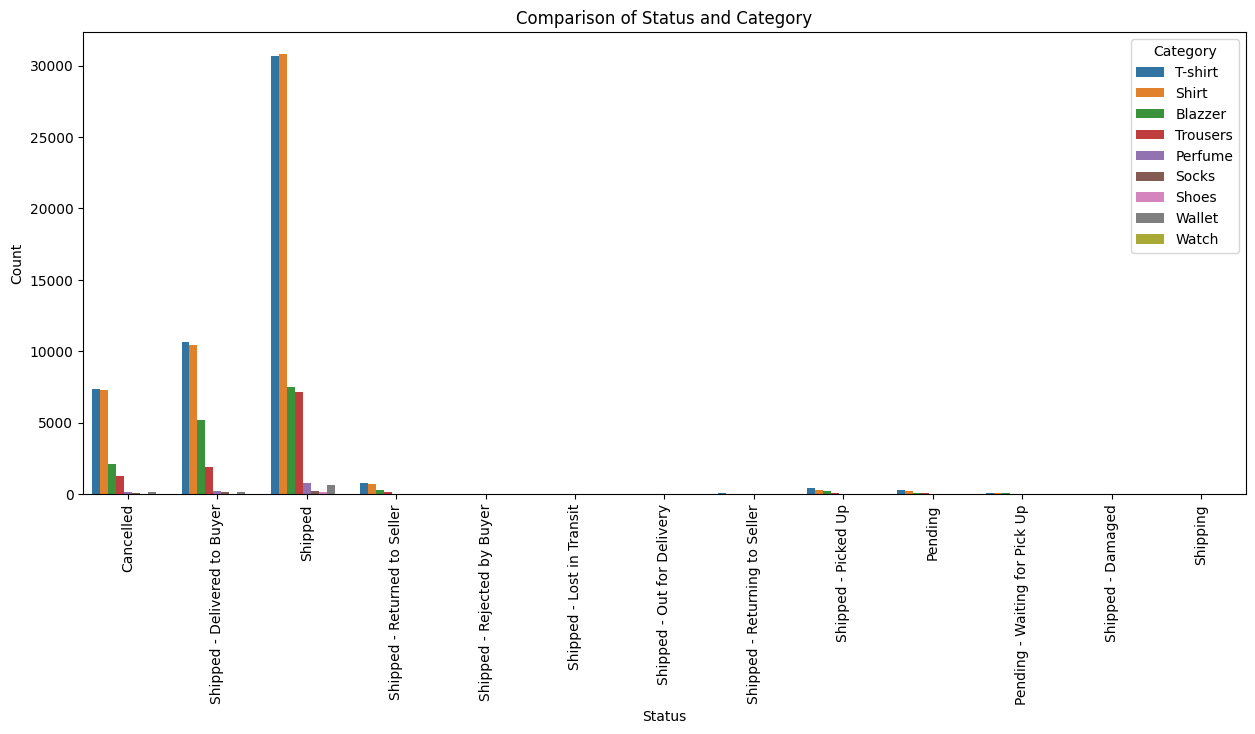

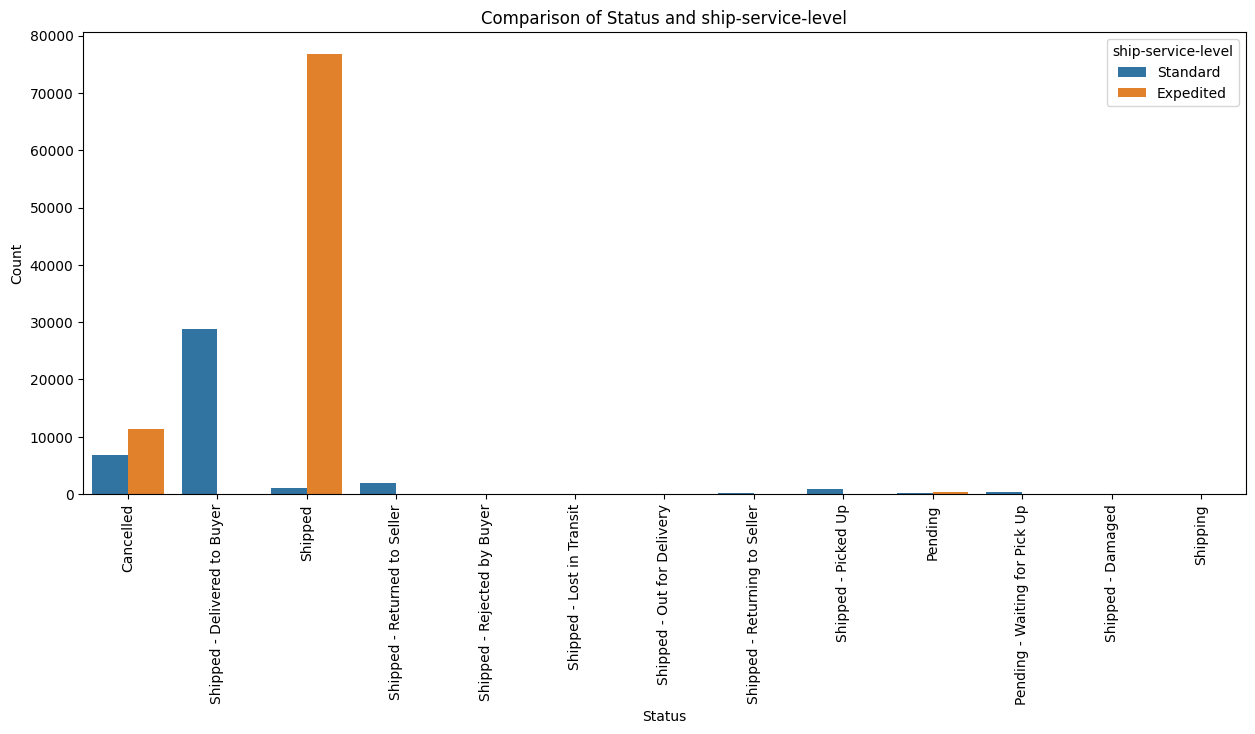

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grouped bar chart
plt.figure(figsize=(15, 6))  # Adjust figure size if needed
sns.countplot(x='Status', hue='Category', data=df)

# Customize the chart
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Comparison of Status and Category')
plt.xlabel('Status')
plt.ylabel('Count')

# Display the chart
plt.show()


# Create another grouped bar chart for ship-service-level
plt.figure(figsize=(15, 6))  # Adjust figure size if needed
sns.countplot(x='Status', hue='ship-service-level', data=df)

# Customize the chart
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Comparison of Status and ship-service-level')
plt.xlabel('Status')
plt.ylabel('Count')

# Display the chart
plt.show()

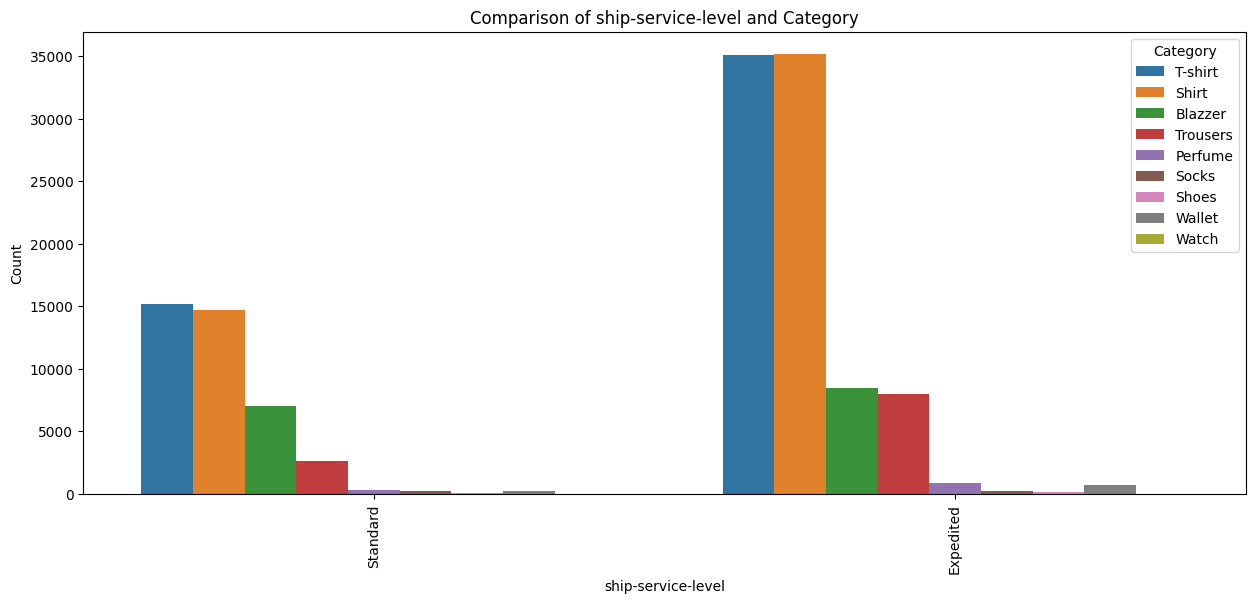

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grouped bar chart
plt.figure(figsize=(15, 6))  # Adjust figure size if needed
sns.countplot(x='ship-service-level', hue='Category', data=df)

# Customize the chart
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Comparison of ship-service-level and Category')
plt.xlabel('ship-service-level')
plt.ylabel('Count')

# Display the chart
plt.show()

**Key Insight:**Expedited shipping has more number of each category than Standard shipping overall. Shirts and T-shirts lead in both Expedited and Standard shipping, but Expedited has higher numbers across all categories.

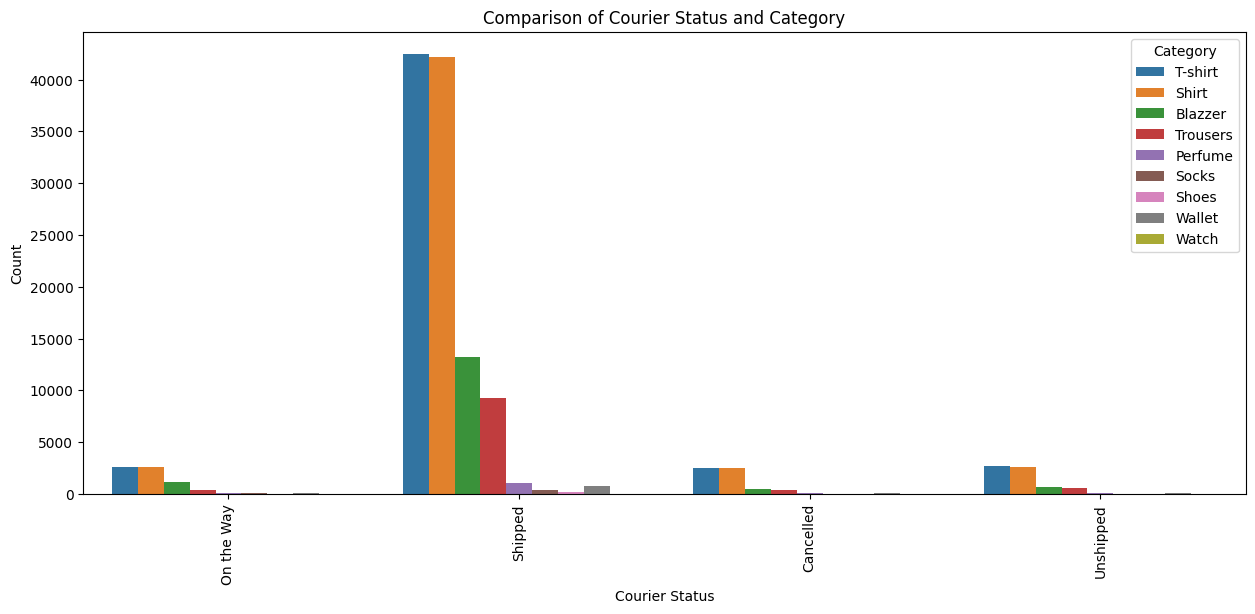

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grouped bar chart
plt.figure(figsize=(15, 6))  # Adjust figure size if needed
sns.countplot(x='Courier Status', hue='Category', data=df)

# Customize the chart
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Comparison of Courier Status and Category')
plt.xlabel('Courier Status')
plt.ylabel('Count')

# Display the chart
plt.show()

**Key Insight:**Most orders are in the 'Shipped' status, with T-shirts, shirts, and blazers leading. Cancelled, On the Way, and Unshipped statuses have similar numbers, with cancellations and unshipped orders being relatively low.

In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS', 'Month'],
      dtype='object')

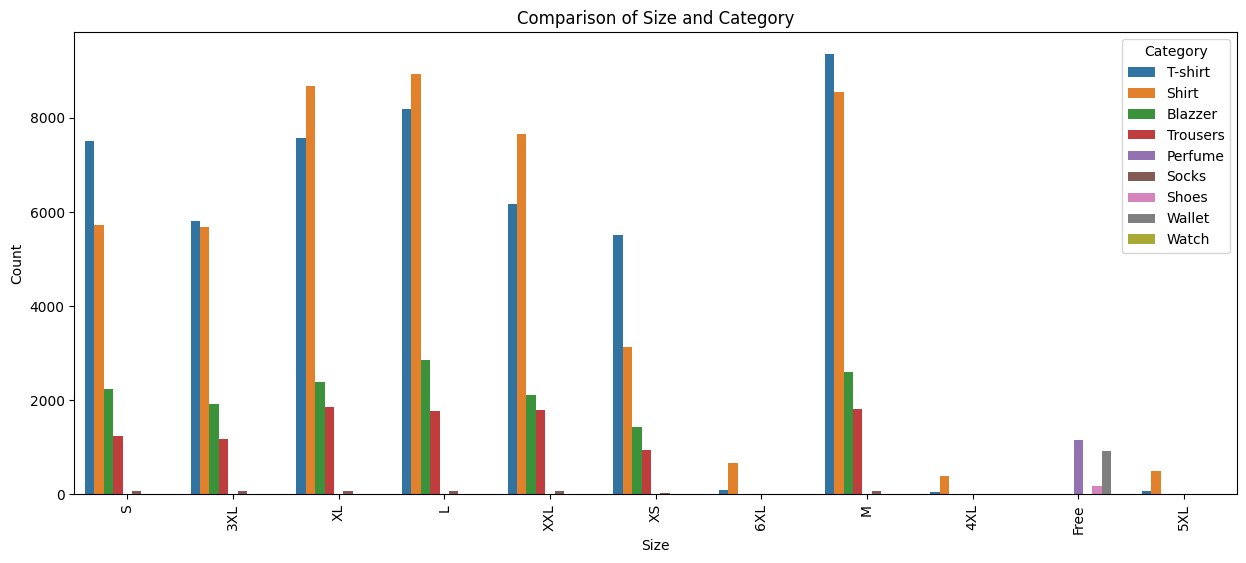

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grouped bar chart
plt.figure(figsize=(15, 6))  # Adjust figure size if needed
sns.countplot(x='Size', hue='Category', data=df)

# Customize the chart
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Comparison of Size and Category')
plt.xlabel('Size')
plt.ylabel('Count')

# Display the chart
plt.show()

**Key Insight:**T-shirts and shirts have varying popularity across different sizes. T-shirts are most popular in M, L, and XL sizes, while shirts are most popular in L, XL, and M sizes. XS and Free Size have lower sales.

In [ ]:
#insight=in medium size tshirts sold more
#and same as s size
#but in xl,xxl and l shirts has more order
#most blazer=l size
#least blazer ordered = xs


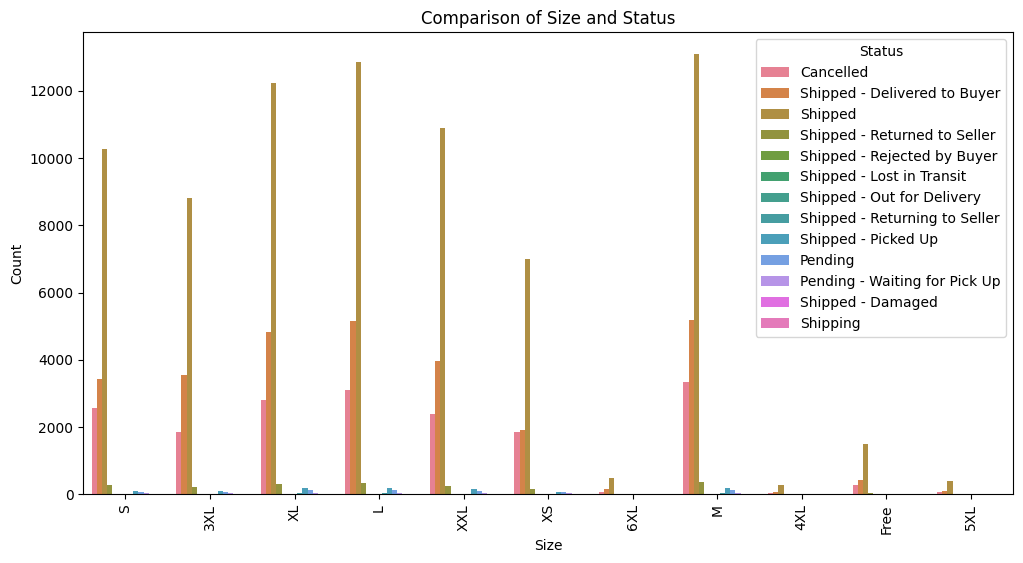

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grouped bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.countplot(x='Size', hue='Status', data=df)

# Customize the chart
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Comparison of Size and Status')
plt.xlabel('Size')
plt.ylabel('Count')

# Display the chart
plt.show()

**Key Insight:**Most Medium-sized orders are shipped, but Large and Medium sizes have the most deliveries. There's a gap between shipments and deliveries, suggesting a need to improve delivery efficiency.

In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS', 'Month'],
      dtype='object')

<Figure size 2000x5000 with 0 Axes>

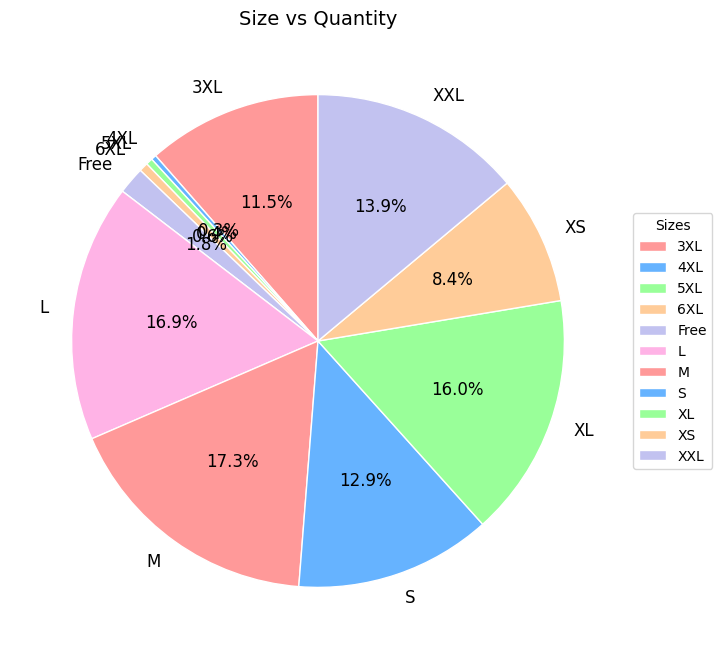

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(20, 50))

# Group data by size and sum quantities
size_quantities = df.groupby('Size')['Qty'].sum()

# Define colors for the pie slices
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0', '#ffb3e6']  # Example colors, adjust as needed

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(size_quantities, labels=size_quantities.index, colors=colors, autopct='%1.1f%%', startangle=90,
        textprops={'fontsize': 12, 'color': 'black'}, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Size vs Quantity', fontsize=14)

# Add a legend for better clarity
plt.legend(size_quantities.index, title="Sizes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Display the chart
plt.show()

**Key Insight:**Medium size has the highest quantity, followed by Large, then Extra Large

In [ ]:
df.currency.value_counts()

,count
currency,
INR,121176


In [ ]:
df.Amount.value_counts()

,count
Amount,
399.00,5439
771.00,2796
735.00,2436
0.00,2343
487.00,2295
...,...
1210.00,1
505.71,1
502.86,1


In [ ]:
df.isna().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,0


In [ ]:
filtered_df = df[(df['Amount'].isnull()) & (df['currency'].isnull())]
filtered_df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS,Month
8,8,407-5443024-5233168,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,...,NaN,HYDERABAD,TELANGANA,500008.0,IN,False,NaN,NaN,NaN,4
29,29,404-5933402-8801952,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Shirt,3XL,On the Way,...,NaN,GUWAHATI,ASSAM,781003.0,IN,False,Easy Ship,NaN,NaN,4
65,65,171-4137548-0481151,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,Shirt,XXL,Cancelled,...,NaN,Dahod,Gujarat,389151.0,IN,False,NaN,NaN,NaN,4
84,84,403-9950518-0349133,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,Shirt,M,Cancelled,...,NaN,HYDERABAD,TELANGANA,500072.0,IN,False,NaN,NaN,NaN,4
95,95,405-9112089-3379536,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,Shirt,L,Cancelled,...,NaN,PUNE,MAHARASHTRA,411046.0,IN,False,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128904,128903,406-3923120-4345139,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,Shirt,M,Cancelled,...,NaN,ANANTAPUR,ANDHRA PRADESH,515001.0,IN,False,NaN,NaN,NaN,5
128908,128907,403-6757403-6097100,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,...,NaN,GREATER NOIDA,UTTAR PRADESH,201306.0,IN,False,NaN,NaN,NaN,5
128909,128908,403-6757403-6097100,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,...,NaN,GREATER NOIDA,UTTAR PRADESH,201306.0,IN,False,NaN,NaN,NaN,5
128959,128958,408-9513596-4393945,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,L,Cancelled,...,NaN,Bengaluru,KARNATAKA,560037.0,IN,False,NaN,NaN,NaN,5


In [ ]:
df["Amount"].fillna(0,inplace=True)

<ipython-input-9-c9d126867310>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Amount"].fillna(0,inplace=True)


In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS', 'Month'],
      dtype='object')

In [ ]:
df = df.drop('currency', axis=1)

In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country',
       'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

In [ ]:
df.isna().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,0


In [ ]:
filtered_df = df[df['Amount'].isnull()]

In [ ]:
filtered_df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS,Month
8,8,407-5443024-5233168,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,...,NaN,HYDERABAD,TELANGANA,500008.0,IN,False,NaN,NaN,NaN,4
29,29,404-5933402-8801952,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Shirt,3XL,On the Way,...,NaN,GUWAHATI,ASSAM,781003.0,IN,False,Easy Ship,NaN,NaN,4
65,65,171-4137548-0481151,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,Shirt,XXL,Cancelled,...,NaN,Dahod,Gujarat,389151.0,IN,False,NaN,NaN,NaN,4
84,84,403-9950518-0349133,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,Shirt,M,Cancelled,...,NaN,HYDERABAD,TELANGANA,500072.0,IN,False,NaN,NaN,NaN,4
95,95,405-9112089-3379536,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,Shirt,L,Cancelled,...,NaN,PUNE,MAHARASHTRA,411046.0,IN,False,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128904,128903,406-3923120-4345139,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,Shirt,M,Cancelled,...,NaN,ANANTAPUR,ANDHRA PRADESH,515001.0,IN,False,NaN,NaN,NaN,5
128908,128907,403-6757403-6097100,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,...,NaN,GREATER NOIDA,UTTAR PRADESH,201306.0,IN,False,NaN,NaN,NaN,5
128909,128908,403-6757403-6097100,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,...,NaN,GREATER NOIDA,UTTAR PRADESH,201306.0,IN,False,NaN,NaN,NaN,5
128959,128958,408-9513596-4393945,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,L,Cancelled,...,NaN,Bengaluru,KARNATAKA,560037.0,IN,False,NaN,NaN,NaN,5


In [ ]:
df['Amount'] = df['Amount'].fillna(0)

In [ ]:
df['Amount'].value_counts()

,count
Amount,
0.00,10143
399.00,5439
771.00,2796
735.00,2436
487.00,2295
...,...
1210.00,1
505.71,1
502.86,1


In [ ]:
df.isna().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,0


In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country',
       'B2B', 'fulfilled-by', 'New', 'PendingS', 'Month'],
      dtype='object')

In [ ]:
df.isna().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,0


In [ ]:
filtered_df = df[df['ship-city'].isnull()]

In [ ]:
filtered_df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS,Month
1872,1871,404-0566904-4825137,2022-04-29,Shipped,Amazon,Amazon.in,Expedited,Trousers,L,Shipped,...,493.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,4
1873,1872,404-0566904-4825137,2022-04-29,Shipped,Amazon,Amazon.in,Expedited,Shirt,L,Shipped,...,458.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,4
2090,1871,404-0566904-4825137,2022-04-29,Shipped,Amazon,Amazon.in,Expedited,Trousers,L,Shipped,...,493.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,4
2091,1872,404-0566904-4825137,2022-04-29,Shipped,Amazon,Amazon.in,Expedited,Shirt,L,Shipped,...,458.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,4
8753,8752,406-4003386-8768363,2022-04-25,Shipped,Amazon,Amazon.in,Expedited,Shirt,M,Shipped,...,432.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,4
11216,11215,402-0107720-7057168,2022-04-23,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,...,654.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,4
13253,13252,407-4532637-8415521,2022-04-22,Cancelled,Merchant,Amazon.in,Standard,Shirt,S,On the Way,...,380.0,NaN,NaN,NaN,NaN,False,Easy Ship,NaN,NaN,4
15689,15688,404-9229894-8608305,2022-04-21,Shipped,Amazon,Amazon.in,Expedited,Shirt,M,Shipped,...,442.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,4
16788,16787,402-4919636-4333150,2022-04-20,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,376.0,NaN,NaN,NaN,NaN,False,Easy Ship,NaN,NaN,4
18352,18351,405-4927647-8064368,2022-04-19,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,1112.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,4


In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country',
       'B2B', 'fulfilled-by', 'New', 'PendingS', 'Month'],
      dtype='object')

In [ ]:
df.isna().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,0


In [ ]:
df["ship-city"].value_counts()

,count
ship-city,
BENGALURU,11208
HYDERABAD,8077
MUMBAI,6125
NEW DELHI,5792
CHENNAI,5430
...,...
Nashik road,1
PHULPUR AZAMGARH DISTRICT,1
"MUMBAI,malad east",1


In [ ]:
df['ship-state'] = df['ship-state'].str.upper()

Number of customers per state:
 ship-state
MAHARASHTRA               14940
KARNATAKA                 11329
UTTAR PRADESH              7403
TAMIL NADU                 7355
TELANGANA                  7198
DELHI                      4707
KERALA                     4292
WEST BENGAL                4237
ANDHRA PRADESH             3407
GUJARAT                    3042
HARYANA                    2966
RAJASTHAN                  1803
MADHYA PRADESH             1682
BIHAR                      1473
ODISHA                     1409
PUNJAB                     1321
ASSAM                      1160
UTTARAKHAND                1107
JHARKHAND                  1071
GOA                         787
CHHATTISGARH                630
HIMACHAL PRADESH            528
JAMMU & KASHMIR             474
MANIPUR                     227
CHANDIGARH                  220
PUDUCHERRY                  215
ANDAMAN & NICOBAR           161
MEGHALAYA                   139
SIKKIM                      127
TRIPURA                     1

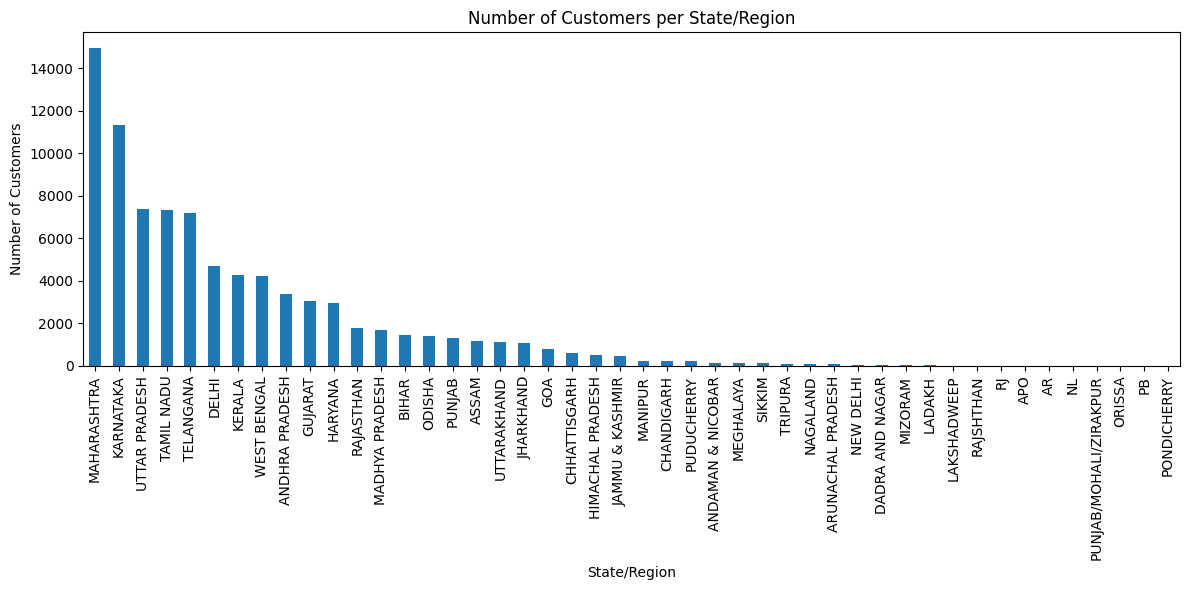

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
# Group by 'ship-state' and count unique 'Order ID' for each state
state_customer_counts = df.groupby('ship-state')['Order ID'].nunique().sort_values(ascending=False)

# Print the result
print("Number of customers per state:\n", state_customer_counts)

# Create a bar chart for visualization
plt.figure(figsize=(12, 6))
state_customer_counts.plot(kind='bar')
plt.title('Number of Customers per State/Region')
plt.xlabel('State/Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**Key Insight:**Maharashtra has the most customers, followed by Karnataka. Uttar Pradesh, Tamil Nadu, and Telangana have similar customer numbers, while Delhi, Kerala, and West Bengal also have notable customer bases

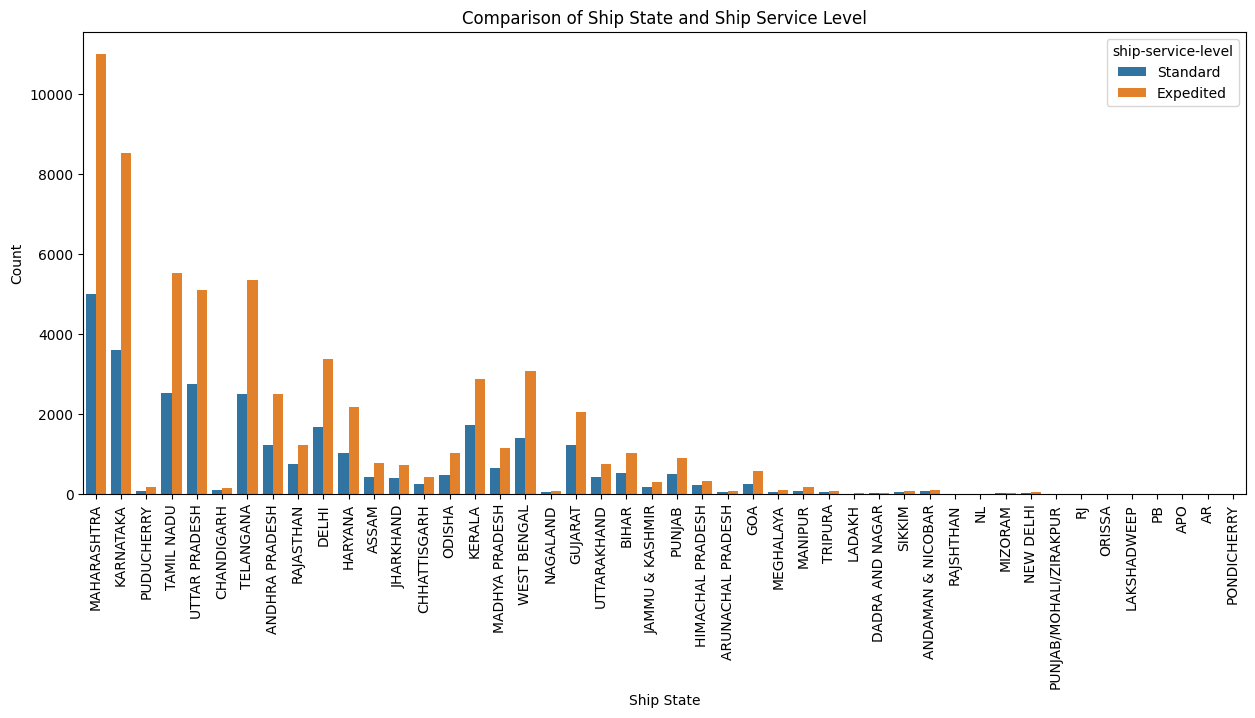

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
plt.figure(figsize=(15, 6))  # Adjust figure size if needed
sns.countplot(x='ship-state', hue='ship-service-level', data=df)

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Comparison of Ship State and Ship Service Level')
plt.xlabel('Ship State')
plt.ylabel('Count')

plt.show()

**Key Insight:**Maharashtra and Karnataka are top states for expedited shipments. Standard shipping is popular in Maharashtra, Karnataka, and Uttar Pradesh, while Tamil Nadu and Telangana have similar shipment trends.

In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country',
       'B2B', 'fulfilled-by', 'New', 'PendingS', 'Purchase Segment'],
      dtype='object')

In [ ]:
import pandas as pd

# Assuming your dataframe is named 'df' and has an 'Amount' column representing purchase amount

# Define purchase amount thresholds for segmentation
thresholds = [0, 500, 1000, 2000, float('inf')]  # Customize thresholds as needed
labels = ['Low', 'Medium', 'High', 'Very High']

# Create a new column 'Purchase Segment' based on purchase amount
df['Purchase Segment'] = pd.cut(df['Amount'], bins=thresholds, labels=labels)

# Display the updated dataframe
df.head()

In [ ]:
df["Purchase Segment"].value_counts()

,count
Purchase Segment,
Medium,45914
Low,30170
High,8920
Very High,40


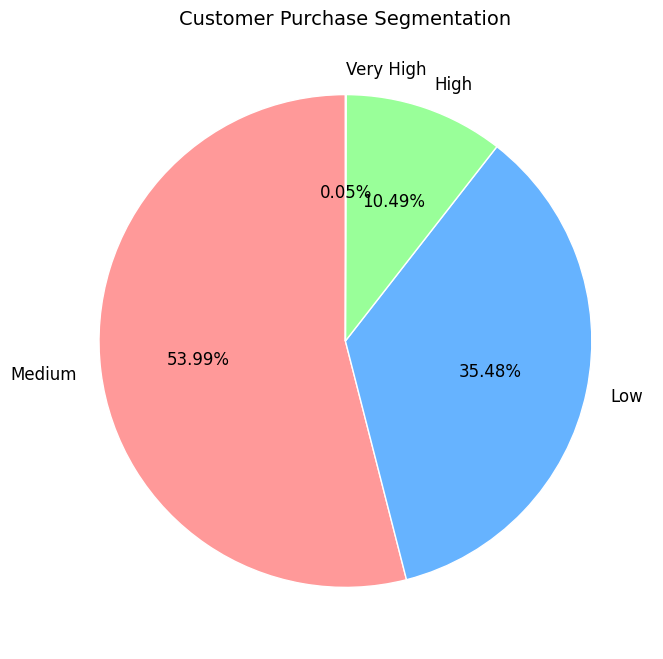

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your dataframe is named 'df' and has a 'Purchase Segment' column

# Group data by purchase segment and count occurrences
segment_counts = df['Purchase Segment'].value_counts()

# Define colors for the pie slices
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Example colors, adjust as needed

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, colors=colors, autopct='%1.2f%%', startangle=90,
        textprops={'fontsize': 12, 'color': 'black'}, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Customer Purchase Segmentation', fontsize=14)

# Display the chart
plt.show()

**Key Insight:**Customer Purchase Segments:
1. Medium (₹500-₹1000): Highest percentage
2. Low (₹0-₹500): Second highest
3. High (₹1000-₹2000): Smaller portion
4. Very High (₹2000+): Negligible

In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country',
       'B2B', 'fulfilled-by', 'New', 'PendingS', 'Purchase Segment'],
      dtype='object')

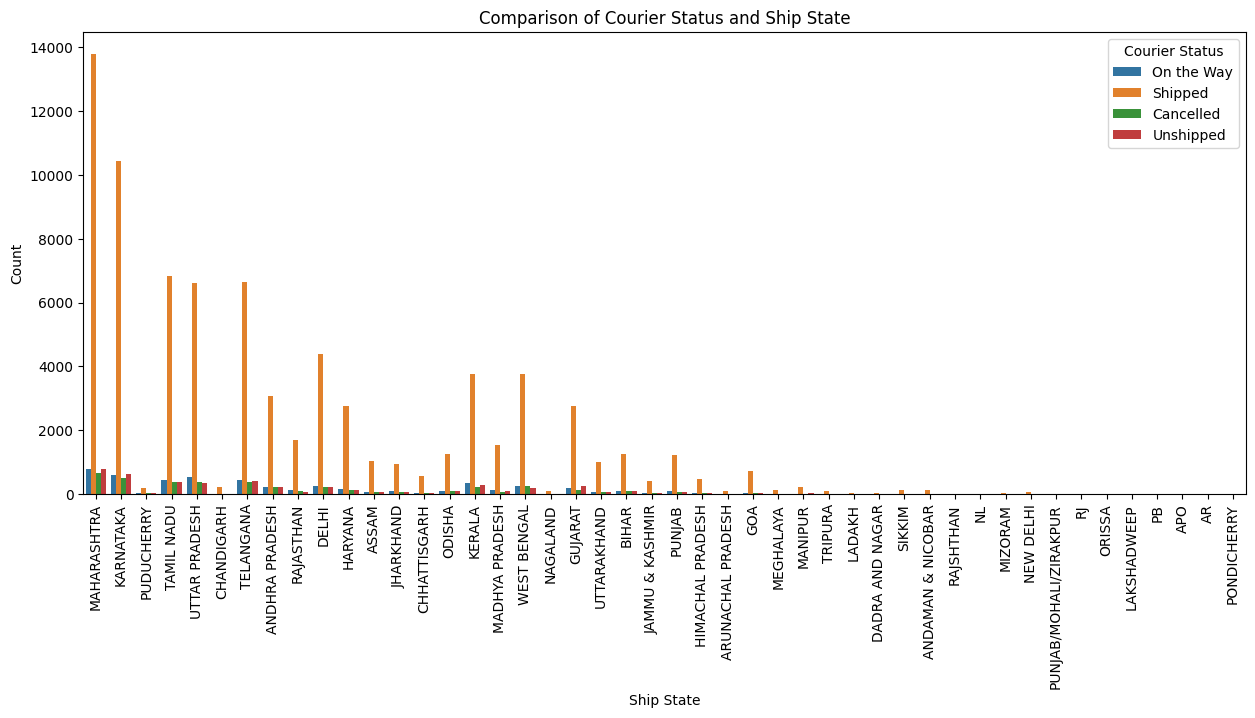

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
plt.figure(figsize=(15, 6))  # Adjust figure size if needed
sns.countplot(x='ship-state', hue='Courier Status', data=df)

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Comparison of Courier Status and Ship State')
plt.xlabel('Ship State')
plt.ylabel('Count')

plt.show()

**Key Insight:**Maharashtra tops in shipments, cancellations, and unshipped orders, followed by Karnataka. Maharashtra also has slightly more orders 'On the Way'. Tamil Nadu, Telangana, and Uttar Pradesh follow similar trends

In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country',
       'B2B', 'fulfilled-by', 'New', 'PendingS', 'Purchase Segment'],
      dtype='object')

In [ ]:
df["B2B"].value_counts()

,count
B2B,
False,91563
True,636


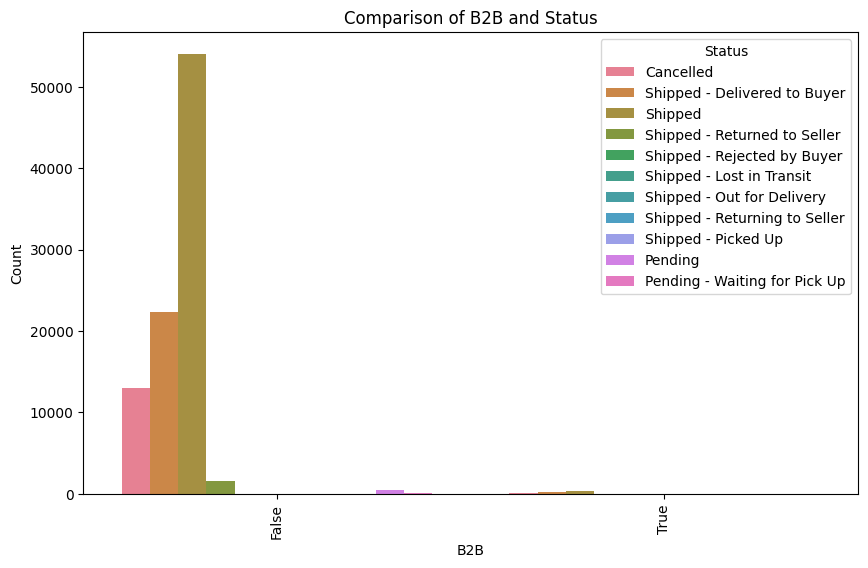

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.countplot(x='B2B', hue='Status', data=df)

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Comparison of B2B and Status')
plt.xlabel('B2B')
plt.ylabel('Count')

plt.show()

**Key Insight:**When B2B is False, most orders are Shipped, followed by Delivered to Buyer, Cancelled, and Returned to Seller. When B2B is True, order numbers are significantly lower across all statuses.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92200 entries, 0 to 92199
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   index               92200 non-null  int64   
 1   Order ID            92200 non-null  object  
 2   Date                92200 non-null  object  
 3   Status              92200 non-null  object  
 4   Fulfilment          92200 non-null  object  
 5   Sales Channel       92200 non-null  object  
 6   ship-service-level  92200 non-null  object  
 7   Category            92200 non-null  object  
 8   Size                92200 non-null  object  
 9   Courier Status      92200 non-null  object  
 10  Qty                 92200 non-null  int64   
 11  Amount              92200 non-null  float64 
 12  ship-city           92172 non-null  object  
 13  ship-state          92172 non-null  object  
 14  ship-postal-code    92172 non-null  float64 
 15  ship-country        92172 non-null  

In [ ]:
df.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,92200.000000,92200.000000,92200.000000,92172.00000,0.0,0.0
mean,46097.983015,0.902798,604.724682,462602.49987,NaN,NaN
std,26616.787811,0.317955,310.061368,192853.86293,NaN,NaN
min,0.000000,0.000000,0.000000,110001.00000,NaN,NaN
25%,23048.750000,1.000000,399.000000,380054.00000,NaN,NaN
50%,46098.500000,1.000000,574.000000,500020.00000,NaN,NaN
75%,69148.250000,1.000000,771.000000,600026.00000,NaN,NaN
max,92198.000000,15.000000,5584.000000,989898.00000,NaN,NaN


In [ ]:
df = df.drop(['New', 'PendingS'], axis=1)

In [ ]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,92200.000000,92200.000000,92200.000000,92172.00000
mean,46097.983015,0.902798,604.724682,462602.49987
std,26616.787811,0.317955,310.061368,192853.86293
min,0.000000,0.000000,0.000000,110001.00000
25%,23048.750000,1.000000,399.000000,380054.00000
50%,46098.500000,1.000000,574.000000,500020.00000
75%,69148.250000,1.000000,771.000000,600026.00000
max,92198.000000,15.000000,5584.000000,989898.00000


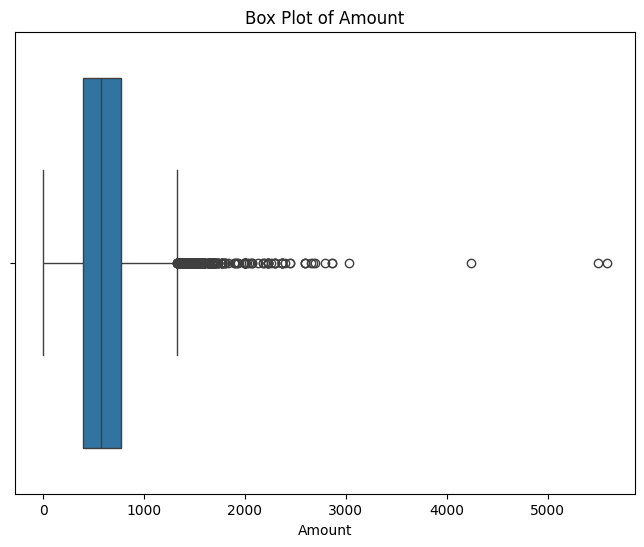

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.boxplot(x='Amount', data=df)

plt.title('Box Plot of Amount')
plt.xlabel('Amount')

plt.show()

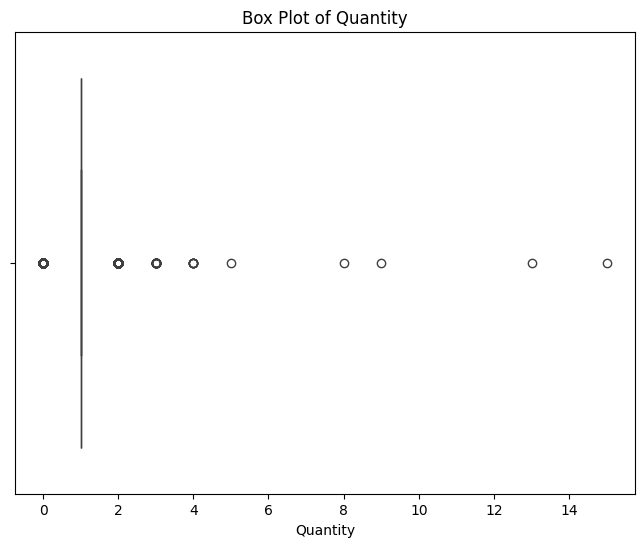

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.boxplot(x='Qty', data=df)

plt.title('Box Plot of Quantity')
plt.xlabel('Quantity')

plt.show()

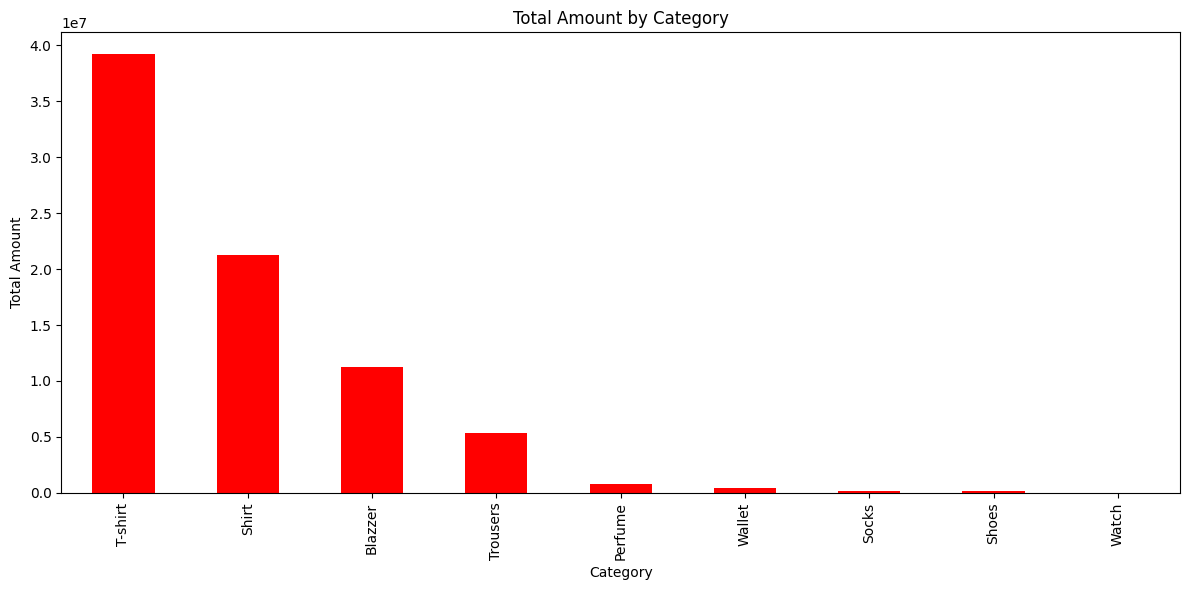

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
category_amount = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
category_amount.plot(kind='bar', color='red')
plt.title('Total Amount by Category')
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**Key Insight:**T-shirts generate the highest total revenue, followed by shirts, blazers, trousers, perfumes, and wallets

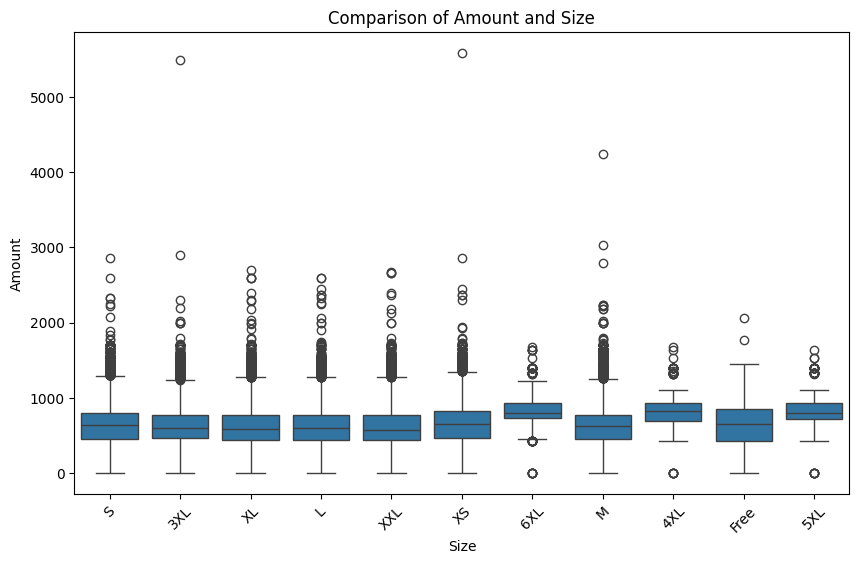

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Size', y='Amount', data=df)
plt.title('Comparison of Amount and Size')
plt.xlabel('Size')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

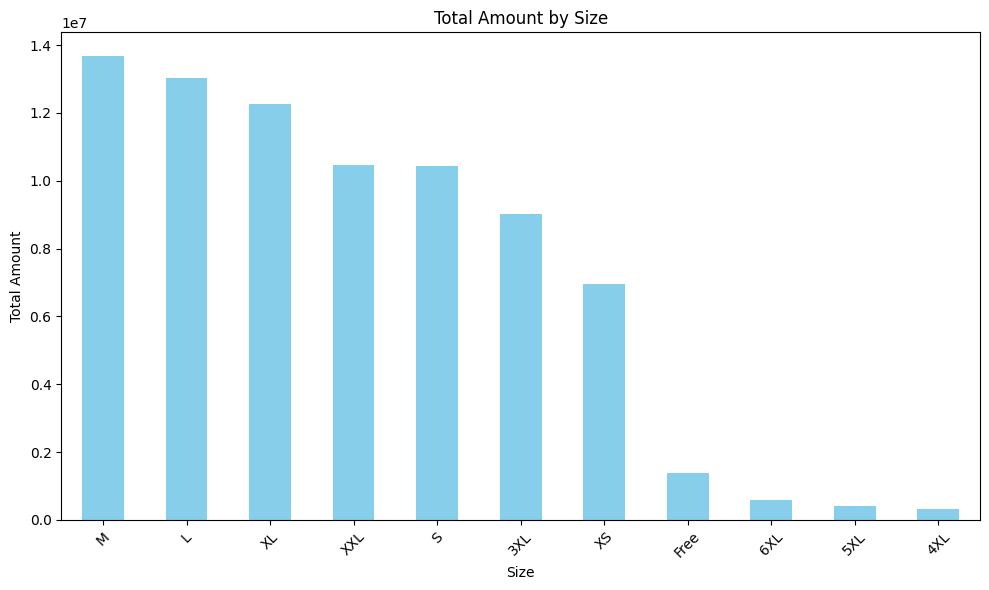

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

size_amount = df.groupby('Size')['Amount'].sum().sort_values(ascending=False)  # or .mean() for average

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
size_amount.plot(kind='bar', color='skyblue')
plt.title('Total Amount by Size')  # or 'Average Amount by Size' if using .mean()
plt.xlabel('Size')
plt.ylabel('Total Amount')  # or 'Average Amount' if using .mean()
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()
plt.show()

**Key Insight:**Medium size generates the highest total revenue, followed by Large, Extra Large, and Double Extra Large. Smaller sizes like XS and Free Size have lower revenue contributions.



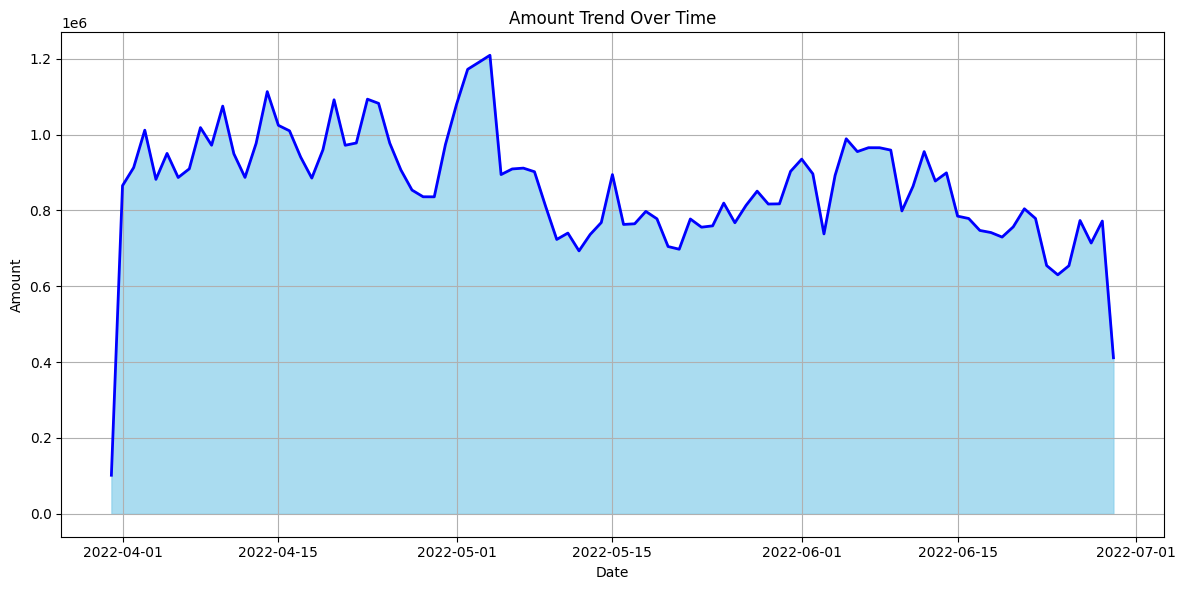

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Group data by date and sum the amounts
daily_amount = df.groupby('Date')['Amount'].sum()

# Create the area chart
plt.figure(figsize=(12, 6))
plt.fill_between(daily_amount.index, daily_amount.values, color='skyblue', alpha=0.7)
plt.plot(daily_amount.index, daily_amount.values, color='blue', linewidth=2)
plt.title('Amount Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

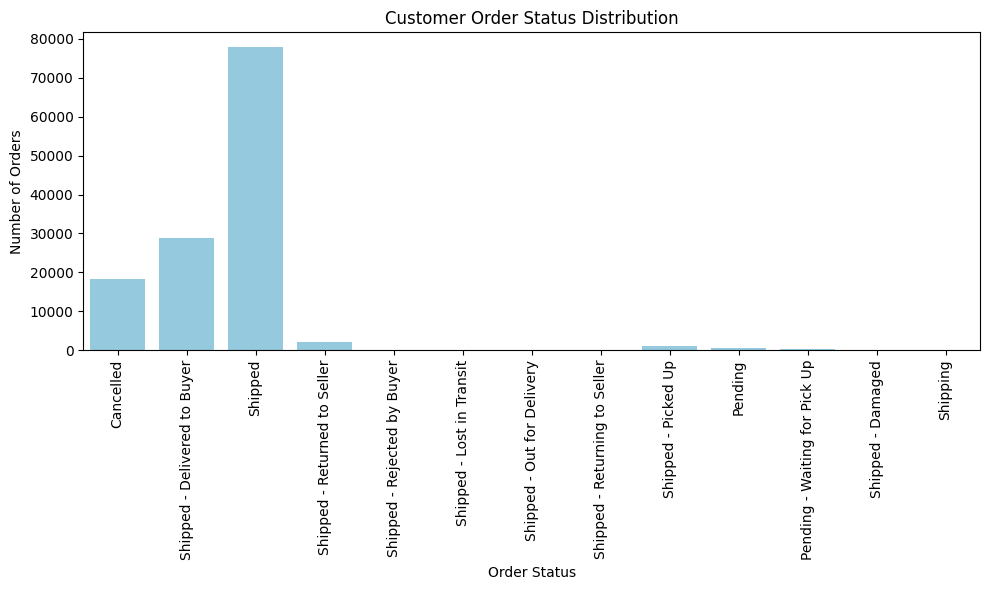

In [ ]:


plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.countplot(x='Status', data=df, color='skyblue')
plt.title('Customer Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.tight_layout()
plt.show()